In [4]:
# 표준 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings('ignore')


In [5]:
#영화 데이터 읽기

# data_2006_2007 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2006~2007.xlsx', skiprows=[0,1,2,3,5])
# data_2008_2009 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2008~2009.xlsx', skiprows=[0,1,2,3,5])
# data_2010_2011 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2010~2011.xlsx', skiprows=[0,1,2,3,5])
# data_2012_2013 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2012~2013.xlsx', skiprows=[0,1,2,3,5])
# data_2014_2015 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2014~2015.xlsx', skiprows=[0,1,2,3,5])
# data_2016_2017 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2016~2017.xlsx', skiprows=[0,1,2,3,5])
# data_2018_2019 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2018~2019.xlsx', skiprows=[0,1,2,3,5])
# data_2020_2021 = pd.read_excel('C:/Users/lodos/Desktop/데이터분석/2020~2021.xlsx', skiprows=[0,1,2,3,5])

data_2006_2007 = pd.read_excel('D:/python3/source/데이터분석 data/2006~2007.xlsx', skiprows=[0,1,2,3,5])
data_2008_2009 = pd.read_excel('D:/python3/source/데이터분석 data/2008~2009.xlsx', skiprows=[0,1,2,3,5])
data_2010_2011 = pd.read_excel('D:/python3/source/데이터분석 data/2010~2011.xlsx', skiprows=[0,1,2,3,5])
data_2012_2013 = pd.read_excel('D:/python3/source/데이터분석 data/2012~2013.xlsx', skiprows=[0,1,2,3,5])
data_2014_2015 = pd.read_excel('D:/python3/source/데이터분석 data/2014~2015.xlsx', skiprows=[0,1,2,3,5])
data_2016_2017 = pd.read_excel('D:/python3/source/데이터분석 data/2016~2017.xlsx', skiprows=[0,1,2,3,5])
data_2018_2019 = pd.read_excel('D:/python3/source/데이터분석 data/2018~2019.xlsx', skiprows=[0,1,2,3,5])
data_2020_2021 = pd.read_excel('D:/python3/source/데이터분석 data/2020~2021.xlsx', skiprows=[0,1,2,3,5])

In [6]:
# 각 각의 영화 데이터 리스트에 담기

data = [data_2006_2007, data_2008_2009, data_2010_2011, data_2012_2013, data_2014_2015, data_2016_2017,
       data_2018_2019, data_2020_2021]

In [7]:
# column 확인

data_2006_2007.columns

Index(['순위', '영화명', '개봉일', '매출액 ', '매출액', '누적매출액 ', '관객수 ', '누적관객수 ', '스크린수 ',
       '상영횟수 ', '대표국적 ', '국적 ', '제작사 ', '배급사 ', '등급 ', '장르 ', '감독 ', '배우 '],
      dtype='object')

In [8]:
# column 변경 (공백 제거)

for data_ in  data : 
    
    data_.columns = ['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우']
    
    
   

In [9]:
# 각 각의 데이터 하나의 변수로 합치기

a = 0

for data_ in data[1:]  :
    
    if  a == 0 :
    
        data_2006_2021 = pd.merge(data_2006_2007, data_, how = 'outer')
        
        a = 1
    
    else :
        
        data_2006_2021 = pd.merge(data_2006_2021, data_, how  = 'outer')
    
        


In [10]:
# total data 정보 학인

data_2006_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38415 entries, 0 to 38414
Data columns (total 18 columns):
순위        38415 non-null object
영화명       38402 non-null object
개봉일       22778 non-null datetime64[ns]
매출액       38415 non-null int64
매출액점유율    38407 non-null float64
누적매출액     38415 non-null int64
관객수       38415 non-null int64
누적관객수     38415 non-null int64
스크린수      38415 non-null int64
상영횟수      38415 non-null int64
대표국적      37761 non-null object
국적        37740 non-null object
제작사       9627 non-null object
배급사       20518 non-null object
등급        24195 non-null object
장르        36767 non-null object
감독        31248 non-null object
배우        23060 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(10)
memory usage: 5.6+ MB


In [11]:
# data 중간에 2년 주기로 순위 열에 합계란 제거

data_2006_2021.set_index('순위', inplace=True) 
data_2006_2021 = data_2006_2021.drop(['합계'])
data_2006_2021 = data_2006_2021.reset_index()

In [12]:
data_2006_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38407 entries, 0 to 38406
Data columns (total 18 columns):
순위        38407 non-null int64
영화명       38402 non-null object
개봉일       22778 non-null datetime64[ns]
매출액       38407 non-null int64
매출액점유율    38407 non-null float64
누적매출액     38407 non-null int64
관객수       38407 non-null int64
누적관객수     38407 non-null int64
스크린수      38407 non-null int64
상영횟수      38407 non-null int64
대표국적      37761 non-null object
국적        37740 non-null object
제작사       9627 non-null object
배급사       20518 non-null object
등급        24195 non-null object
장르        36767 non-null object
감독        31248 non-null object
배우        23060 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(9)
memory usage: 5.3+ MB


In [13]:
data_2006_2021.head()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,괴물,2006-07-27,66715881300,0.036,66715881300,10917195,10917195,647,113093,한국,한국,영화사청어람(주),(주)쇼박스,12세관람가,"SF,가족,드라마",봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창..."
1,2,왕의 남자,2005-12-29,61605851900,0.033,66015355400,9793917,10513699,313,106181,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,15세이상관람가,드라마,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성..."
2,3,디워,2007-08-01,49339934700,0.027,49339934700,7855441,7855441,622,96434,한국,한국,㈜영구아트,(주)쇼박스,12세이상관람가,"액션,판타지",심형래,"브룩스 아만다,베어 제이슨"
3,4,트랜스포머,2007-06-28,47619379338,0.026,47619379338,7389696,7389696,863,92291,미국,미국,"드림웍스픽쳐스,드림웍스 SKG,파라마운트 픽쳐스",CJ ENM,12세이상관람가,"SF,액션,어드벤처",마이클 베이,"샤이아 라보프,메간 폭스"
4,5,화려한 휴가,2007-07-25,44098449600,0.024,44098449600,6855300,6855300,551,96522,한국,한국,기획시대(주),CJ ENM,12세이상관람가,드라마,김지훈,"김상경,이창민,안성기,이요원,이준기,박철민,송진호,김명훈,신진철,황대원,김하림,조일..."


In [14]:
# 누적 관객수 1만명 이하인 영화 제거

index_drop = data_2006_2021[data_2006_2021['누적관객수'] <= 10000].index
data_2006_2021 = data_2006_2021.drop(index_drop)

In [15]:
data_2006_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6793 entries, 0 to 38375
Data columns (total 18 columns):
순위        6793 non-null int64
영화명       6793 non-null object
개봉일       6699 non-null datetime64[ns]
매출액       6793 non-null int64
매출액점유율    6793 non-null float64
누적매출액     6793 non-null int64
관객수       6793 non-null int64
누적관객수     6793 non-null int64
스크린수      6793 non-null int64
상영횟수      6793 non-null int64
대표국적      6779 non-null object
국적        6779 non-null object
제작사       3030 non-null object
배급사       6599 non-null object
등급        6704 non-null object
장르        6775 non-null object
감독        6736 non-null object
배우        6473 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(9)
memory usage: 1008.3+ KB


In [16]:
# 중복된 영화를 제거하기 위해 누적 매출을 기준으로 내림차순

data_2006_2021 = data_2006_2021.sort_values(by='누적매출액' ,ascending=False)

In [17]:
# 인덱스 리셋 후 중복된 영화 중 첫 번째 영화를 제외하고 모두 제거 

data_2006_2021 = data_2006_2021.reset_index()
data_2006_2021 = data_2006_2021.drop_duplicates(['영화명'], keep = 'first')

In [18]:
data_2006_2021['영화명'].value_counts()

아뉴스 데이                        1
미라클 프롬 헤븐                     1
도레미파솔라시도                      1
몬스터 대학교                       1
신은 죽지 않았다 3: 어둠 속의 빛          1
갱                             1
남태평양                          1
카센타                           1
최면                            1
소녀                            1
페넬로피                          1
나, 다니엘 블레이크                   1
시원찮은 그녀를 위한 육성방법 피날레          1
마지막 4중주                       1
덕혜옹주                          1
용의주도 미스신                      1
나누와 실라의 대모험                   1
어느 예술가의 마지막 일주일               1
배드 사마리안                       1
시리아나                          1
부르고뉴, 와인에서 찾은 인생              1
순종                            1
닥터 스트레인지                      1
센과 치히로의 행방불명                  1
프리즈너스                         1
데드풀                           1
신문기자                          1
화차                            1
타이밍                           1
브루클린                          1
                             ..
호두까기 인형과

In [19]:
# 인덱스 초기화 및 필요 없는 columns 제거

data_2006_2021 = data_2006_2021.reset_index()

del data_2006_2021['level_0']
del data_2006_2021['index']
del data_2006_2021['매출액']
del data_2006_2021['매출액점유율']
del data_2006_2021['관객수']
del data_2006_2021['순위']
del data_2006_2021['스크린수']
del data_2006_2021['상영횟수']
del data_2006_2021['대표국적']
del data_2006_2021['국적']
del data_2006_2021['제작사']
# del data_2006_2021['배우']
del data_2006_2021['감독']
del data_2006_2021['등급']
del data_2006_2021['배급사']

In [20]:
# '개봉일' 문자열로 변환 후 년도만 표기

data_2006_2021['개봉일'] = data_2006_2021['개봉일'].apply(lambda x : str(x)[0:4])

In [21]:
# '개봉일' NaT값 확인

data_2006_2021[data_2006_2021['개봉일'] == 'NaT']

,영화명,개봉일,누적매출액,누적관객수,장르,배우
1066,로보트 태권V(76년 디지털 복원판),NaT,3617228000,656670,SF,NaN
1462,오페라의 유령 : 25주년 특별 공연,NaT,1872479000,105298,뮤지컬,"라민 카림루,시에라 보게스"
1553,2005 [통합]패키지영화,NaT,1623473500,234307,NaN,NaN
1705,뽀로로 극장판 눈요정 마을 대모험,NaT,1289929200,258909,애니메이션,"이선,함수정,홍소영,이미자,정미숙,김환진"
2253,2006 [통합]영화제/기획전/회고전 등,NaT,581154200,106393,NaN,NaN
2350,"[통합]회고전, 기획전 등",NaT,501984300,104955,NaN,NaN
2492,2005 [통합]영화제/기획전/회고전 등,NaT,412262500,75563,NaN,NaN
2629,2007 [통합]영화제/기획전/회고전 등,NaT,353345600,60705,"드라마,전쟁",NaN
2728,[통합]영화패키지상영,NaT,308437000,35186,NaN,NaN
2874,BIFAN2016 판타스틱 단편 걸작선 1,NaT,258603000,43003,기타,NaN


In [22]:
# '개봉일' value 가 NaT인 값 제거

index_drop = data_2006_2021[data_2006_2021['개봉일'] == 'NaT'].index
data_2006_2021 = data_2006_2021.drop(index_drop)

In [23]:
data_2006_2021[data_2006_2021['개봉일'] == 'NaT']

,영화명,개봉일,누적매출액,누적관객수,장르,배우


In [24]:
# 배우의 결측 값이 대부분 애니메이션 이므로 배우 피처에 animation으로 채움

data_2006_2021['배우'] = data_2006_2021['배우'].fillna('animation')

In [26]:
# 결측 값 제거

data_2006_2021 = data_2006_2021.dropna(how = 'any')

In [27]:
# 인덱스 리셋 

data_2006_2021 = data_2006_2021.reset_index()
del data_2006_2021['index']

In [28]:
data_2006_2021.head()

,영화명,개봉일,누적매출액,누적관객수,장르,배우
0,극한직업,2019,139655543516,16266338,코미디,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,명량,2014,135757418810,17615686,"사극,액션","최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,..."
2,아바타,2009,125304346000,13338863,"SF,액션,어드벤처","샘 워싱턴,조 샐다나,시고니 위버"
3,어벤져스: 엔드게임,2019,122492181020,13977602,"액션,SF","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."
4,신과함께-죄와 벌,2017,115727528087,14414658,"판타지,드라마","하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안..."


In [29]:
data_2006_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 6 columns):
영화명      4026 non-null object
개봉일      4026 non-null object
누적매출액    4026 non-null int64
누적관객수    4026 non-null int64
장르       4026 non-null object
배우       4026 non-null object
dtypes: int64(2), object(4)
memory usage: 188.8+ KB


In [30]:
# 사용자 정보 샘플 생성 

data1 = {'user_id' : ['1번', '2번', '3번'],
       '시청한영화' : [['괴물', '명량','극한직업','돌연변이'], ['마녀', '타워'], ['남한산성', '명량', '암살']],
       '선호장르' : [['코미디', '액션'], ['코미디', '액션', '드라마'], ['SF', '사극']],
       '선호배우' : [['이하늬', '류승룡', '이광수'], ['김다미', '손예진', '고수','하정우'], ['황정민', '주지훈']]}

In [31]:
user_data = pd.DataFrame(data1)

In [32]:
user_data = user_data.set_index('user_id')

In [33]:
user_data

,시청한영화,선호장르,선호배우
user_id,,,
1번,"[괴물, 명량, 극한직업, 돌연변이]","[코미디, 액션]","[이하늬, 류승룡, 이광수]"
2번,"[마녀, 타워]","[코미디, 액션, 드라마]","[김다미, 손예진, 고수, 하정우]"
3번,"[남한산성, 명량, 암살]","[SF, 사극]","[황정민, 주지훈]"


In [34]:
# 장르에 따른 영화 딕셔너리에 담기

genre_movie_dict = {}

for index, row in data_2006_2021.iterrows():
    
    genre_combination = row['장르']
    movie_combination = row['영화명']
    p = genre_combination.split(',')
    m = movie_combination
    
    for genre in p:
        
        if genre not in genre_movie_dict :
            
            genre_movie_dict[genre] = []
               
        
    for i in range(len(p)) :

        if m not in genre_movie_dict[p[i]] :
            
            genre_movie_dict[p[i]].append(m)
            
genre_movie_dict        

{'코미디': ['극한직업',
  '7번방의 선물',
  '겨울왕국',
  '엑시트',
  '검사외전',
  '스파이더맨: 파 프롬 홈',
  '국가대표',
  '럭키',
  '써니',
  '과속스캔들',
  '은밀하게 위대하게',
  '완벽한 타인',
  '쿵푸팬더 2',
  '전우치',
  '킹스맨: 골든 서클',
  '인사이드 아웃',
  '미녀는 괴로워',
  '조선명탐정 : 각시투구꽃의 비밀',
  '바람과 함께 사라지다',
  '내 아내의 모든 것',
  '데드풀 2',
  '투사부일체',
  '조선명탐정 : 사라진 놉의 딸',
  '댄싱퀸',
  '쿵푸 팬더',
  '캐리비안의 해적: 세상의 끝에서',
  '토이 스토리 4',
  '인턴',
  '박수건달',
  '그것만이 내 세상',
  '드래곤 길들이기',
  '맨 인 블랙 3',
  '탐정: 리턴즈',
  '7급 공무원',
  '아이 캔 스피크',
  '어바웃 타임',
  '캐리비안의 해적: 죽은 자는 말이 없다',
  '인크레더블 2',
  '박물관이 살아있다!',
  '캐리비안의 해적 : 망자의 함',
  '스물',
  '형',
  '퀵',
  '슈렉 포에버',
  '방자전',
  '헬로우 고스트',
  '오싹한 연애',
  '빅 히어로',
  '레드: 더 레전드',
  '보안관',
  '도리를 찾아서',
  '히트맨',
  '탐정 : 더 비기닝',
  '시라노; 연애조작단',
  '조선명탐정: 흡혈괴마의 비밀',
  '마이펫의 이중생활',
  '위험한 상견례',
  '보스 베이비',
  '굿모닝 프레지던트',
  '라스트 갓파더',
  '슈렉3',
  '핸콕',
  '가문의 영광4 - 가문의 수난',
  '장화신은 고양이',
  '굿바이 싱글',
  '나잇&데이',
  '나의 사랑 나의 신부',
  '걸리버 여행기',
  '내안의 그놈',
  '가문의 부활 - 가문의 영광3',
  '쩨쩨한 로맨스',
  '1번가의 기적',
  '음란서생',
  '오늘의 연애',
  '토이 스토리 3',


In [35]:
# 배우에 따른 영화 딕셔너리에 담기

actor_movie_dict = {}

for index, row in data_2006_2021.iterrows():
    
    actor_combination = row['배우']
    movie_combination = row['영화명']
    c = actor_combination.split(',')
    m = movie_combination
    
    for actor in c:
        
        if actor not in actor_movie_dict :
            
            actor_movie_dict[actor] = []
               
        
    for i in range(len(c)) :

        if m not in actor_movie_dict[c[i]] :
            
            actor_movie_dict[c[i]].append(m)
            
actor_movie_dict        

{'류승룡': ['극한직업',
  '명량',
  '7번방의 선물',
  '광해, 왕이 된 남자',
  '최종병기 활',
  '내 아내의 모든 것',
  '표적',
  '고지전',
  '아이들...',
  '평양성',
  '가디언즈',
  '베스트셀러',
  '시크릿',
  '황진이',
  '염력',
  '손님',
  '리오 2',
  '퀴즈왕',
  '7년의 밤',
  '도리화가',
  '열한번째 엄마',
  '불신지옥',
  '서울역',
  '된장',
  '지구대표 롤링스타즈',
  '캡틴 하록',
  '최종병기 활 감독확장판'],
 '이하늬': ['극한직업',
  '타짜-신의 손',
  '연가시',
  '블랙머니',
  '조작된 도시',
  '부라더',
  '개구쟁이 스머프',
  '나는 왕이로소이다',
  '침묵',
  '로봇, 소리',
  '달빛궁궐',
  '히트'],
 '진선규': ['극한직업',
  '범죄도시',
  '좋은 놈, 나쁜 놈, 이상한 놈',
  '암수살인',
  '사바하',
  '화차',
  '특별시민',
  '찌라시: 위험한 소문',
  '관능의 법칙',
  '풍산개',
  '동네사람들',
  '아부의 왕',
  '극적인 하룻밤',
  '도리화가',
  '마마',
  '개들의 전쟁'],
 '이동휘': ['극한직업',
  '베테랑',
  '엑시트',
  '공조',
  '럭키',
  '감시자들',
  '타짜-신의 손',
  '재심',
  '신의 한 수: 귀수편',
  '뷰티 인사이드',
  '집으로 가는 길',
  '부라더',
  '남쪽으로 튀어',
  '우는 남자',
  '패션왕',
  '원라인',
  '도리화가',
  '밤의 여왕',
  '어린 의뢰인',
  '새해전야'],
 '공명': ['극한직업', '도희야', '어떤 시선'],
 '양현민': ['극한직업',
  '공작',
  '봉오동 전투',
  '스물',
  '오케이 마담',
  '바람 바람 바람',
  '챔피언',
  '불한당: 나쁜 놈들의 세상',
  '레슬러',
  '그물'

In [36]:
# 장르별 배우에 따른 영화 딕셔너리에 담기

genre_actor_movie_dict = {}

for index, row in data_2006_2021.iterrows():
    
    genre_combination = row['장르']
    actor_combination = row['배우']
    movie_combination = row['영화명']
    p = genre_combination.split(',')
    c = actor_combination.split(',')
    m = movie_combination
    
    for genre in p:
        
        if genre not in genre_actor_movie_dict :
            
            genre_actor_movie_dict[genre] = {}
            
        
    for actor in c :
        
        for i in range(len(p)) :
            
            if actor not in genre_actor_movie_dict[p[i]] :
                
                genre_actor_movie_dict[p[i]][actor]=[]
                
                
            if m not in genre_actor_movie_dict[p[i]][actor] :
            
                genre_actor_movie_dict[p[i]][actor].append(m)
                
     

            
genre_actor_movie_dict

{'코미디': {'류승룡': ['극한직업', '7번방의 선물', '내 아내의 모든 것', '평양성', '염력', '리오 2', '퀴즈왕'],
  '이하늬': ['극한직업', '부라더', '나는 왕이로소이다', '히트'],
  '진선규': ['극한직업', '관능의 법칙', '아부의 왕', '극적인 하룻밤', '개들의 전쟁'],
  '이동휘': ['극한직업', '엑시트', '럭키', '부라더', '남쪽으로 튀어', '패션왕', '밤의 여왕', '새해전야'],
  '공명': ['극한직업'],
  '양현민': ['극한직업', '스물', '오케이 마담', '바람 바람 바람', '레슬러'],
  '장진희': ['극한직업', '내안의 그놈'],
  '한준우': ['극한직업', '스물'],
  '김명준': ['극한직업', '바람 바람 바람', '레드슈즈', '꼬마영웅 바비'],
  '나철': ['극한직업'],
  '정재광': ['극한직업'],
  '정원창': ['극한직업', '아이 캔 스피크', '내안의 그놈'],
  '김강현': ['극한직업', '엑시트', '형', '연애의 온도', '부라더', '슬로우 비디오', '레슬러'],
  '김지영': ['극한직업',
   '엑시트',
   '국가대표',
   '내 아내의 모든 것',
   '시라노; 연애조작단',
   '마파도2',
   '올드미스다이어리',
   '사랑방 선수와 어머니',
   '7호실',
   '새해전야'],
  '오정세': ['극한직업',
   '퀵',
   '방자전',
   '탐정 : 더 비기닝',
   '쩨쩨한 로맨스',
   '런닝맨',
   '레슬러',
   '남자사용설명서',
   '커플즈',
   '레드카펫',
   '라듸오 데이즈',
   '5백만불의 사나이',
   '그대 이름은 장미',
   '무도리',
   '목숨 건 연애',
   '무림여대생'],
  '이중옥': ['극한직업', '히트맨', '잘못된 만남'],
  '홍완표': ['극한직업', '스물'],
  '고봉구': ['극한직업', 

In [37]:
def data_check() : # 장르 또는 배우 입력 구별
    
    global input_info
    global k
    
    input_info = input('\nesc! 입력시 종료\n장르 또는 배우를 입력해 주세요 : ')
    
    
    data = data_2006_2021
    data_actor_list = data_2006_2021['배우'].apply(lambda x : x.split(',') )
    data_genre_list = data_2006_2021['장르'].apply(lambda x : x.split(',') )
    
    for i in range(len(data.index)) :
        
        if input_info in data_genre_list[i] :
            
            k = 1
            
            return 
        
        elif input_info in data_actor_list[i] :
            
            k = 2
            
            return 
        
        
    if input_info == 'esc!' :
        return 
        
    print('\n다시 입력해 주세요')    
    return data_check()
   


def user_id_check() :   # 입력 한 유저 ID가 사용자 정보 데이터에 있는지 확인
    
    global input_user_id
    global input_user
    
    input_user_id = input('\nesc! 입력시 종료\nID를 입력해 주세요 : ')
    
    if input_user_id in user_data.index :
        
        return input_user_id
    
    elif input_user_id == 'esc!' :
        
        input_user = 'esc!'
            
            
    else : 
        print('\nID를 다시 입력해 주세요.')
        
        return user_id_check()




def user_like_movie_append() :  # 사용자 데이터에서 선호 장르와 선호 배우 정보를 받음
    
    global movie_name 
    
    for genre in user_data['선호장르'][input_user_id] :

        for actor in user_data['선호배우'][input_user_id] :

            try:

                movie_name_1 = genre_actor_movie_dict[genre][actor]


                for i in range(len(movie_name_1)) :


                    movie_name.append(movie_name_1[i])

            except:
                pass
                                    
def watched_movie_remove() : # 사용자 데이터를 토대로 출력 된 영화중 사용자가 시청한 영화 제거 
    
    global movie_name
    
    for j in user_data['시청한영화'][input_user_id] :
        
        if j in movie_name :
            
            movie_name.remove(j)

              
                            
def genre_actor_movie() : # 장르별 배우별 영화 출력
    
    if input_info != '애니메이션':
        
        print('\n장르 : {} '.format(input_info))
        print(genre_movie_dict[input_info])
        
        try :
            input_actor = input('\n배우를 입력해 주세요 : ')
            print('\n장르 : {} , 배우 : {}' .format(input_info, input_actor))
            print(genre_actor_movie_dict[input_info][input_actor])
        
        except :
            print('\n')
            print('-'*40)
            print('다시 입력해 주세요')
            print('-'*40)
            
    else :
        
        print('\n장르 : {} '.format(input_info))
        print(genre_movie_dict[input_info])
        
def actor_genre_movie() : # 배우별 장르별 영화 출력
    
    print('\n배우 : {} ' .format(input_info))
    print(actor_movie_dict[input_info])

    try :

        input_genre = input('\n장르를 입력해 주세요 : ')        
        print('\n장르 : {} , 배우 : {}' .format(input_genre, input_info))
        print(genre_actor_movie_dict[input_genre][input_info])

    except:
        
        print('\n')
        print('-'*40)
        print('다시 입력해 주세요')
        print('-'*40)
    


    

In [ ]:
# 프로그램 구동

while True :
    
    input_user = input('\nesc! 입력시 종료\n1. 사용자 추천 -- 2. 직접선택 : ')
    
    
    if input_user == '1' :
        
        movie_name = []
        
        input_user_id = ''
        
        user_id_check()
        
        
        if input_user_id in user_data.index :
            
            user_like_movie_append()

            watched_movie_remove()

            movie_name = list(set(movie_name))
            
            print('\n사용자 선호하는 장르 : {} 사용자 선호하는 배우 : {}\n'.format(user_data['선호장르'][input_user_id],
                                                               user_data['선호배우'][input_user_id]))
            print(movie_name)

            movie_name = []
        
        
    if input_user == 'esc!' :
        
        print('\n프로그램을 종료합니다')
        break
        
        
        
        
    if input_user == '2' :
    
        
        input_info = ''        
        k = 0
        data_check()

        if k == 1 :

            genre_actor_movie()


        elif k == 2 :
            
            actor_genre_movie()
            
        if input_info == 'esc!' :
            print('\n프로그램을 종료합니다')
            break
            




esc! 입력시 종료
1. 사용자 추천 -- 2. 직접선택 : 1

esc! 입력시 종료
ID를 입력해 주세요 : 1번

사용자 선호하는 장르 : ['코미디', '액션'] 사용자 선호하는 배우 : ['이하늬', '류승룡', '이광수']

['평양성', '최종병기 활 감독확장판', '극한직업', '탐정: 리턴즈', '최종병기 활', '나의 특별한 형제', '나는 왕이로소이다', '다이노소어 어드벤처 3D', '부라더', '간기남', '염력', '내 아내의 모든 것', '표적', '조작된 도시', '리오 2', '7번방의 선물', '덕수리 5형제', '히트', '퀴즈왕']

esc! 입력시 종료
1. 사용자 추천 -- 2. 직접선택 : 1

esc! 입력시 종료
ID를 입력해 주세요 : 2번

사용자 선호하는 장르 : ['코미디', '액션', '드라마'] 사용자 선호하는 배우 : ['김다미', '손예진', '고수', '하정우']

['러브픽션', '잠복근무', '덕혜옹주', '클로젯', '잘 알지도 못하면서', '무방비도시', '집으로 가는 길', '허삼관', '황해', '신과함께-죄와 벌', '군도: 민란의 시대', '공범', '두 번째 사랑', '베를린', '작업의 정석', '평행이론', '아내가 결혼했다', '아가씨', '국가대표 완결판-못 다한 이야기', '비스티 보이즈', '577 프로젝트', '보트', '신과함께-인과 연', '범죄와의 전쟁: 나쁜놈들 전성시대', '터널', 1987, '백두산', '추격자', '상의원', '고지전', '용서받지 못한 자', '구미호 가족', '암살', '초능력자', '오싹한 연애', '국가대표', '멋진 하루', '시간', 'PMC: 더 벙커', '남한산성', '우리 생애 최고의 순간', '나쁜놈은 죽는다']

esc! 입력시 종료
1. 사용자 추천 -- 2. 직접선택 : 2

esc! 입력시 종료
장르 또는 배우를 입력해 주세요 : 이광수

배우 : 이광수 
['탐정: 리턴즈', '타짜: 원 아이드 잭', '평양성'

In [46]:
opening_day_data = data_2006_2021['개봉일'].value_counts().sort_index()

In [47]:
opening_day = opening_day_data[-11:]

In [48]:
opening_day

2011    239
2012    246
2013    258
2014    290
2015    283
2016    300
2017    324
2018    309
2019    156
2020    186
2021     54
Name: 개봉일, dtype: int64

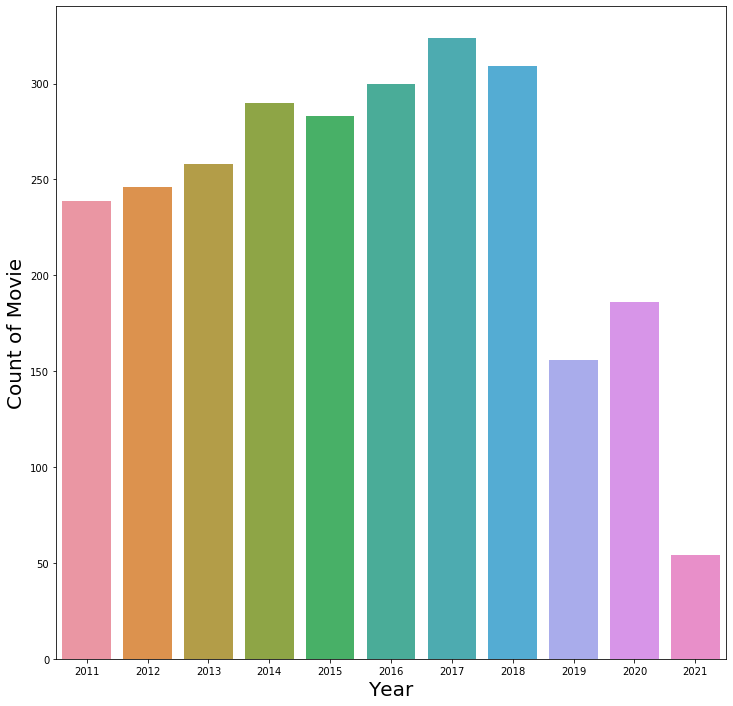

In [49]:
plt.rcParams['figure.figsize'] = [12, 12 ]
sns.barplot(opening_day.index, opening_day.values)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count of Movie', fontsize=20)
plt.show()